<a href="https://colab.research.google.com/github/Rushabhtikale92/Online-Retail-Customer-Segmentation/blob/main/Copy_of_Online_Retail_Customer_Segmentation_RT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import warnings
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/CSV/Online Retail.xlsx - Online Retail.csv')

# **Sample Data**

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# **Checking the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **Droping Null Value**

In [4]:
# Droping null values from the dataset
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
data.shape 

(406829, 8)

**The 'InvoiceNo' feature is contain the data starting with C that indicates a cancellation of transaction. So we just to remove that feature. **

In [5]:
data = data[~data['InvoiceNo'].str.contains('C')]

In [ ]:
data.shape 

(397924, 8)

In [ ]:
Description_data = data['Description'].value_counts().reset_index()
Description_data.rename(columns = {'index' : 'Description Name'}, inplace = True)
Description_data.rename(columns = {'Description' : 'Count'}, inplace = True)
Description_data.head()

,Description Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [ ]:
Description_data.tail()

,Description Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


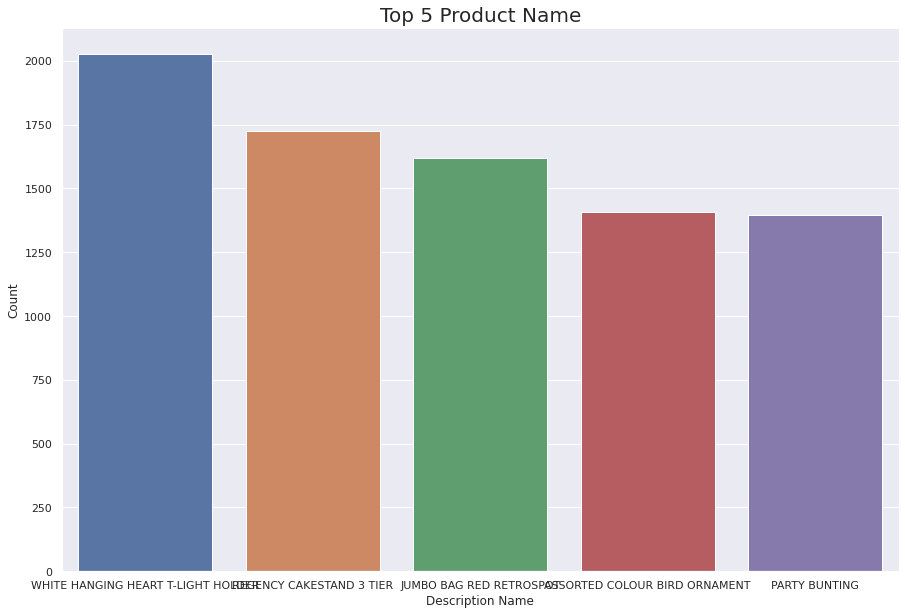

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Top 5 Product Name',fontsize=20)
sns.barplot(x='Description Name',y='Count',data=Description_data[:5])

From the above graph we can conclude that this product are among top five selled and most of the customer are purchasing this product, so this is well high in demand.

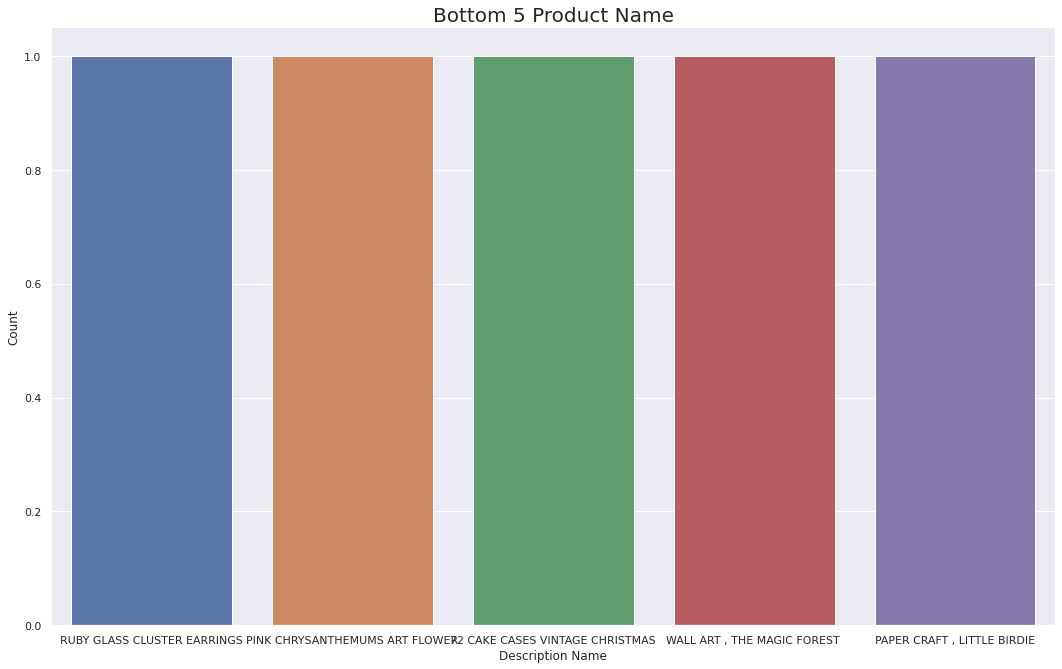

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 Product Name',fontsize=20)
sns.barplot(x='Description Name',y='Count',data=Description_data[-5:])

From the above graph we can conclude that this product are among bottom five selled and most of the customer are avoiding this product, so this is well not in high demand.

In [ ]:
StockCode_data = data['StockCode'].value_counts().reset_index()
StockCode_data.rename(columns = {'index' : 'StockCode_Name'}, inplace = True)
StockCode_data.rename(columns = {'StockCode' : 'Count'}, inplace = True)
StockCode_data.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


In [ ]:
StockCode_data.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


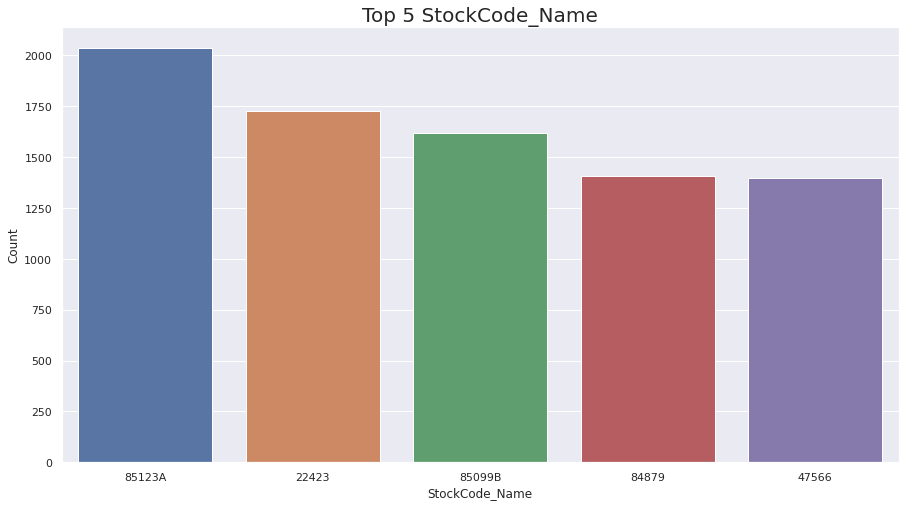

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Top 5 StockCode_Name',fontsize=20)
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_data[:5])

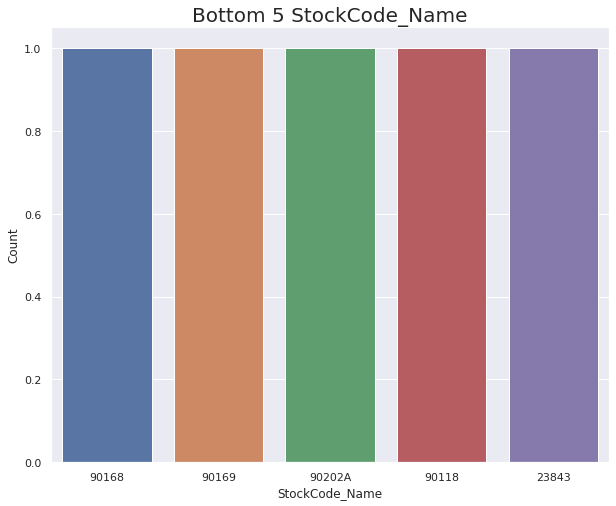

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Bottom 5 StockCode_Name',fontsize=20)
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_data[-5:])

# **Country Analysis**

In [ ]:
Country_data = data['Country'].value_counts().reset_index()
Country_data.rename(columns = {'index' : 'Country_Name'}, inplace = True)
Country_data.rename(columns = {'Country' : 'Count'}, inplace = True)
Country_data.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [ ]:
Country_data.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


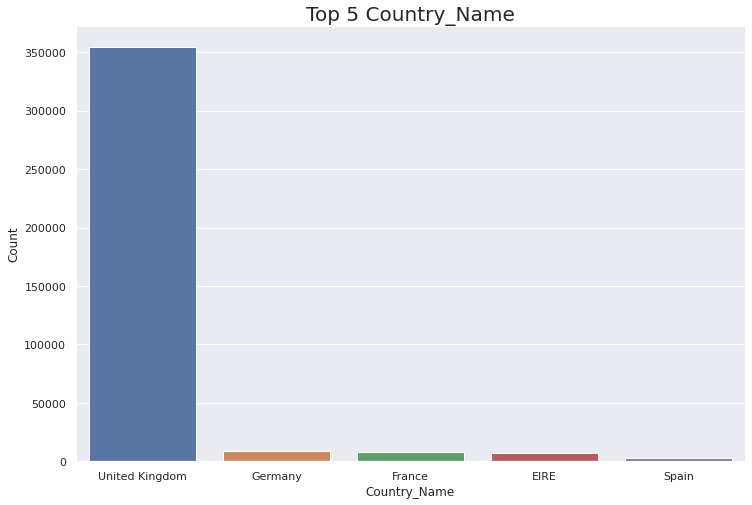

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 5 Country_Name',fontsize=20)
sns.barplot(x='Country_Name',y='Count',data=Country_data[:5])

From the above graph we can easily say that country like united kingdom is have higher transaction as compared to other countries, it means that the united kingdom have higher purchasing chance as compared to Germany, France, EIRE and Spain.

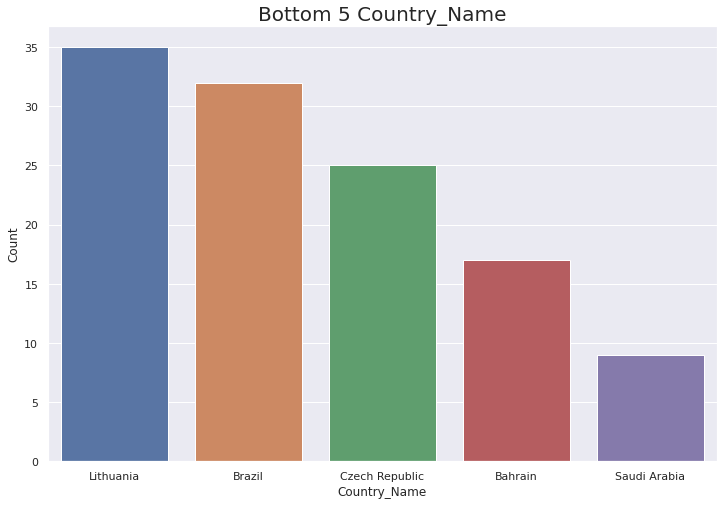

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Bottom 5 Country_Name',fontsize=20)
sns.barplot(x='Country_Name',y='Count',data=Country_data[-5:])

The Saudi Arabia has the lowest purchasing history, so we don't will focus more on this five country for analyse the customer.

# **Feature Engineering**

In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], infer_datetime_format=True)

In [7]:
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['month name'] = data['InvoiceDate'].dt.month_name()
data['day'] = data['InvoiceDate'].dt.day
data['day name'] = data['InvoiceDate'].dt.day_name()
data['Hour'] = data['InvoiceDate'].dt.hour
data['Minute'] = data['InvoiceDate'].dt.minute

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,month name,day,day name,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26


# **Transaction Per Day**

In [10]:
day = data['day name'].value_counts().reset_index()
day.rename(columns = {'index' : 'Day'}, inplace = True)
day.rename(columns = {'day name' : 'Count'}, inplace = True)
day

,Day,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


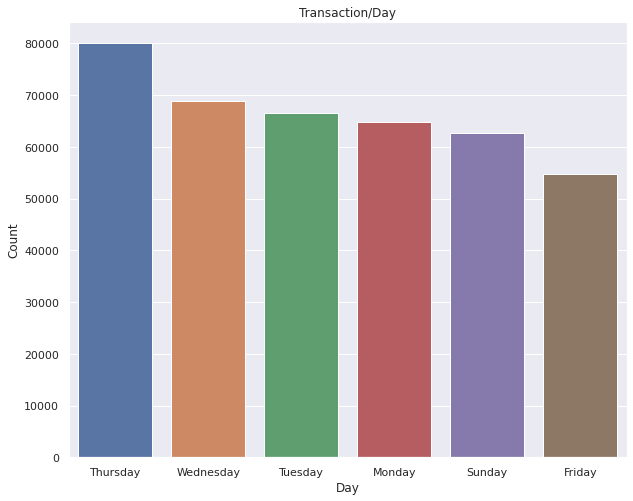

In [11]:
plt.figure(figsize=(10,8))
plt.title('Transaction/Day')
sns.barplot(x='Day',y='Count',data=day)

From the above graph we can easily conclude that on Thursday the transaction is high as compared to the other day, probabibly the customers are free on this day and there is less transaction for Friday.

# **Transaction Per Month**

In [12]:
month = data['month name'].value_counts().reset_index()
month.rename(columns = {'index' : 'Months'}, inplace = True)
month.rename(columns = {'month name' : 'Count'}, inplace = True)
month

,Months,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


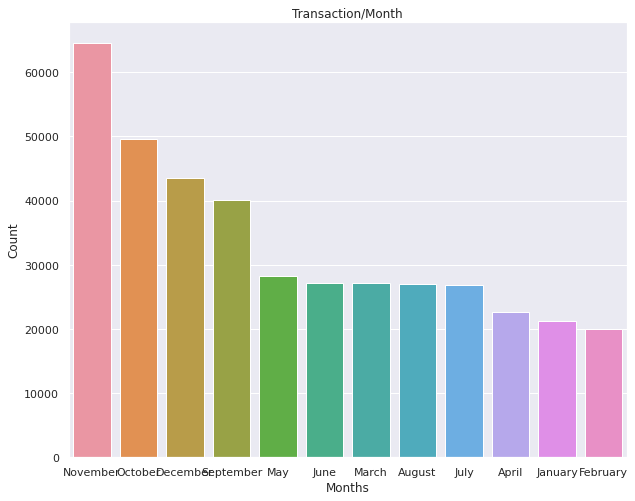

In [13]:
plt.figure(figsize=(10,8))
plt.title('Transaction/Month')
sns.barplot(x='Months',y='Count',data = month)

There is clear inclusion from the above graph that in the month of November i.e winter season and looking over it the customers are purchasing winter cloth and might be the diwali equipments also.
<br>In the month of January and February there is less purchasing of the customer and it is the end of the winter season so from this its clear that customer are having higher transaction in the season of winter.

In [14]:
Hour = data['Hour'].value_counts().reset_index()
Hour.rename(columns = {'index' : 'Hours'}, inplace = True)
Hour.rename(columns = {'Hour' : 'Count'}, inplace = True)
Hour 

,Hours,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


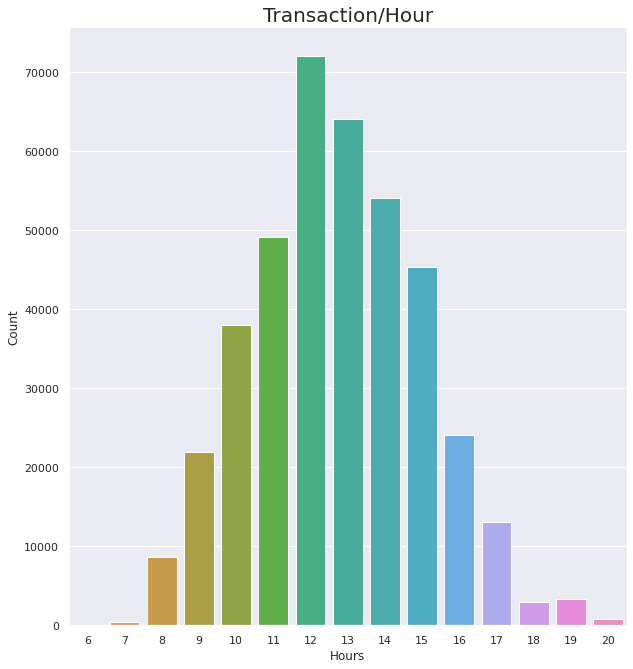

In [15]:
plt.figure(figsize=(10,11))
plt.title('Transaction/Hour',fontsize= 20)
sns.barplot(x='Hours',y='Count',data=Hour)

Hour states that the customers are high purchasing in between 11 to 4 pm so the almost customers are free in this time.

# **Total Price**

In [9]:
data['TotalPrice'] = data['Quantity']*data['UnitPrice']

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,month name,day,day name,Hour,Minute,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26,20.34


Now its a time to pick the appropriate model and train it.
Considering the RFM model which is widely used in the segmentation of the customer. This model helps to divide the customer as it follows:

**Recency :-** The recency of the customer is the difference between the present day and the how many days before the customer was arrived.
<br> **Frequency :-** The frequency of the customer is the total number of purchasing items till on that day.
<br>**Monetary:-** The monetary of the customer is the total worth for that purchasing goods or how much the cost he/she paid uptill now.

# **Recency, Frequency, Monetary (RFM) Model**

In [10]:
import datetime as dt
PRESENT = dt.datetime(2011,12,10)
rfm_model= data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})
#Convert Invoice Date into type int
rfm_model['InvoiceDate'] = rfm_model['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_model.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalPrice': 'Monetary'}, inplace=True) 

rfm_model.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


# **Computing Quantile of RFM values**

Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.



In [11]:
rfm_model['R_quartile'] = pd.qcut(rfm_model['Recency'], 4, ['1','2','3','4'])
rfm_model['F_quartile'] = pd.qcut(rfm_model['Frequency'], 4, ['4','3','2','1'])
rfm_model['M_quartile'] = pd.qcut(rfm_model['Monetary'], 4, ['4','3','2','1'])
rfm_model.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


# **RFM Result Interpretation**

Combine all three quartiles(R_quartile,F_quartile,M_quartile) in a single column, this rank will help you to segment the customers well group.

In [12]:
rfm_model['RFM_Score'] = rfm_model.R_quartile.astype(str)+ rfm_model.F_quartile.astype(str) + rfm_model.M_quartile.astype(str)
rfm_model.head()

,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12347.0,2,182,4310.00,1,1,1,111
12348.0,75,31,1797.24,3,3,1,331
12349.0,18,73,1757.55,2,2,1,221
12350.0,310,17,334.40,4,4,3,443


# **K- Means Clustring**

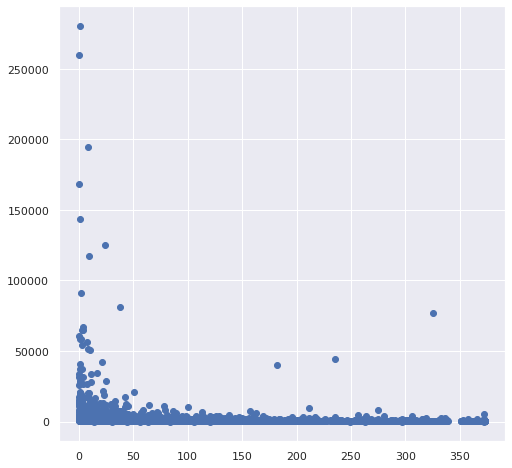

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(rfm_model['Recency'], rfm_model['Monetary'])

The Elbow method is used to determine the optimal number of cluster so we can easily deal with it and in how many forms we can cluster the segmentation of the customer.

# **Applying Elbow Method on Recency and Monetary**

In [13]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
features_rec_mon=['Recency','Monetary']
X_features_rec_mon=rfm_model[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters= k)
    kmeans = kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# **Plotting the distortions of K-Means**

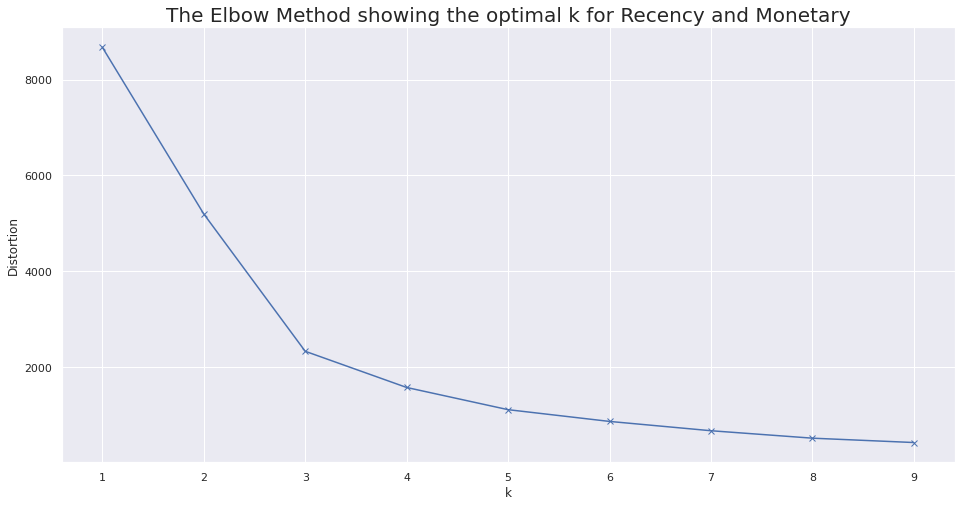

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Recency and Monetary',fontsize =20)
plt.show()

The silhoutte method computes the silhoutte coefficients of each point that measures how much a point is similar to its own cluster compared to other clusters, by providing a succinct graphical representation of how well each object has been classified.



# **Applying silhouette score on Recency and Monetary** 

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
features_rec_mon = ['Recency','Monetary']
X_features_rec_mon = rfm_model[features_rec_mon].values
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10]  
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_ 
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6668198282857047
For n_clusters = 3, silhouette score is 0.6824058534436527
For n_clusters = 4, silhouette score is 0.6939838541313058
For n_clusters = 5, silhouette score is 0.5979104009487998
For n_clusters = 6, silhouette score is 0.6020973267146517
For n_clusters = 7, silhouette score is 0.4938354959618
For n_clusters = 8, silhouette score is 0.5244923453943979
For n_clusters = 9, silhouette score is 0.5109064781451955
For n_clusters = 10, silhouette score is 0.5140954631995339


In [16]:
# Providing optimal number of cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

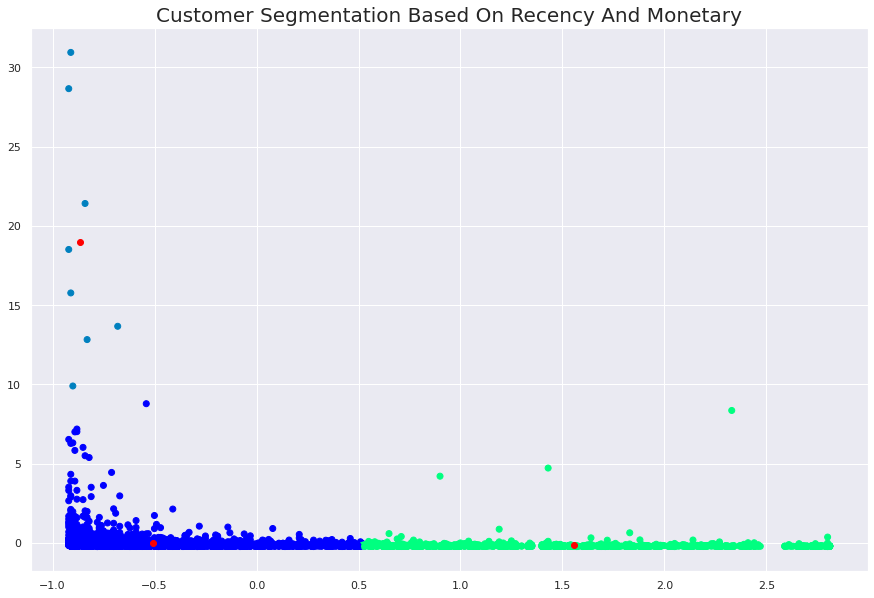

In [17]:
plt.figure(figsize=(15,10))
plt.title('Customer Segmentation Based On Recency And Monetary', fontsize = 20)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='winter')
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='red')

#**Applying DBSCAN  on Recency and Monetary**

**DBSCAN:-** Density Based Spatial Clustering Of Application With Noise.
There are two parameters:

**Epsilon Point:-** The distance taken to draw a circle considering as a radius of the circle.
<BR>**Min_Points:-** There must be present atleast this points. If we consider the min_points as 3 so there should be three points in the circle.
<BR>**Core Points:-** The points which have atleast min_points present in the circle are called as core point.
<BR>**Boundary Point:-** The point which are neighbour to the core point are called as boundary point.
<BR>**Noise Point:-** The point which have neither neighbour point nor core point are called as Noise Point.
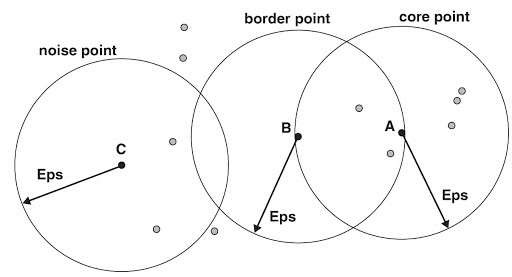

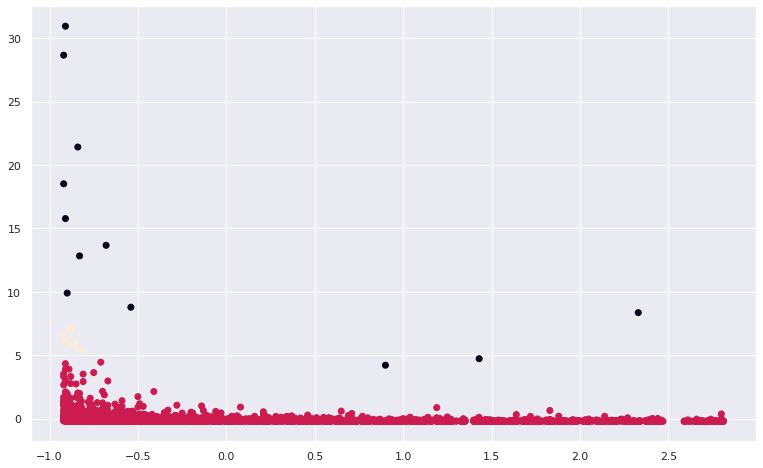

In [18]:
from sklearn.cluster import DBSCAN
from sklearn import metrics 
clustering = DBSCAN(eps=1, min_samples=10).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=clustering)

From the above graph we can conclude that the customers are well segmented by Recency and Monetary.
Now lets move to the another model for Frequency and Monetary and check for the good optimal number of clusters.


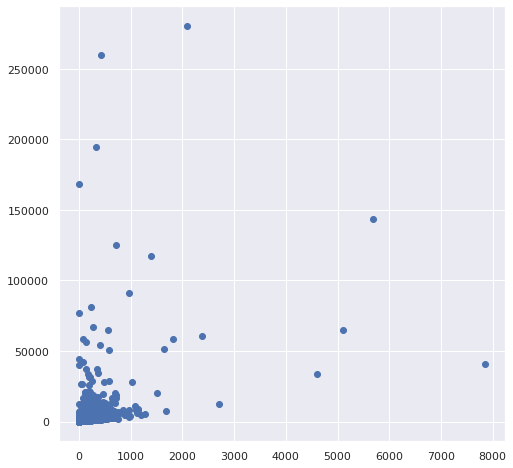

In [19]:
# Looking in the frequency and monetary feature. 
plt.figure(figsize=(8,8))
plt.scatter(rfm_model['Frequency'], rfm_model['Monetary'])